In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
os.getcwd()

'C:\\Users\\rohiranj\\Udemy\\Loan Prediction'

In [3]:
df = pd.read_csv(r'LoanStats3a.csv')
df.head()

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols = df.columns

In [5]:
rows = df.shape[0]
rows

42542

In [6]:
for col in cols:
    if(df[col].isnull().sum() >= rows/2):
        df.drop(col, axis =1, inplace = True)

In [7]:
filtered_col = df.columns
filtered_col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [8]:
col_desc = pd.read_excel(r'C:/ML/Udemy/Loan Data/LCDataDictionary.xlsx')

In [9]:
df_desc = pd.DataFrame()
for col in filtered_col:
    #print(col_desc[col_desc["LoanStatNew"] == col])
    df_desc = df_desc.append(col_desc[col_desc["LoanStatNew"] == col], ignore_index = True)

In [10]:
pd.set_option('display.max_colwidth', -1)
df_desc

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,funded_amnt,The total amount committed to that loan at that point in time.
2,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
3,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,int_rate,Interest Rate on the loan
5,installment,The monthly payment owed by the borrower if the loan originates.
6,grade,LC assigned loan grade
7,sub_grade,LC assigned loan subgrade
8,emp_title,The job title supplied by the Borrower when applying for the loan.*
9,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


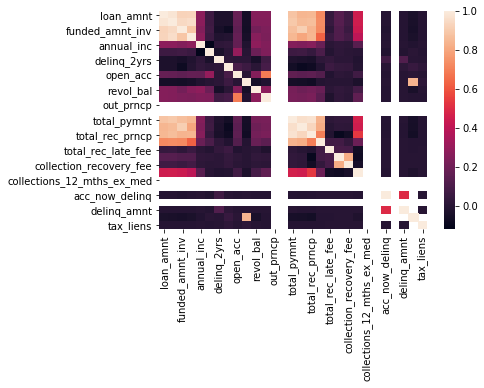

In [11]:
corr = df.corr()
sns.heatmap(corr)

In [12]:
df.drop({'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths'}, axis = 1, inplace = True)

In [13]:
df.drop({'policy_code'}, axis = 1, inplace = True)

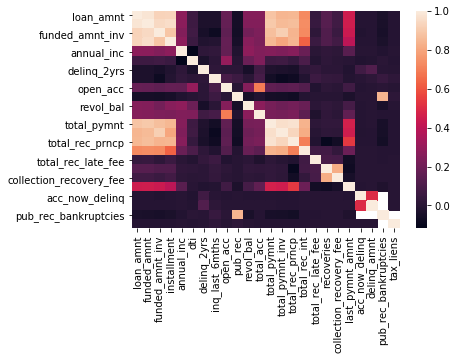

In [14]:
corr = df.corr()
sns.heatmap(corr)

In [15]:
#df['credit_policy'] = 0.0
#def fun_credit_policy(val):
    #if(val == 'Fully Paid' or val == 'Charged Off'):
        #return 1.0 
    #elif(val == 'Does not meet the credit policy. Status:Fully Paid' or val == 'Does not meet the credit policy. Status:Charged Off'):
        #return 0.0

In [16]:
#df['credit_policy'] = df['loan_status'].apply(lambda x : fun_credit_policy(x))

# # # 

In [17]:
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                            5670 
Does not meet the credit policy. Status:Fully Paid     1988 
Does not meet the credit policy. Status:Charged Off    761  
Name: loan_status, dtype: int64

In [18]:
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                            5670 
Does not meet the credit policy. Status:Fully Paid     1988 
Does not meet the credit policy. Status:Charged Off    761  
Name: loan_status, dtype: int64

In [20]:
#df['credit_policy'].fillna(1.0, inplace = True)

In [21]:
df['loan_status'].isnull().sum()

7

In [22]:
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                            5670 
Does not meet the credit policy. Status:Fully Paid     1988 
Does not meet the credit policy. Status:Charged Off    761  
Name: loan_status, dtype: int64

In [23]:
df['loan_status'] =  np.where(df['loan_status'].str.contains('Fully Paid'), 1.0, 0.0)

In [149]:
#sns.countplot('credit_policy', hue = 'loan_status', data = df)

In [27]:
#df.drop('policy_code', axis = 1, inplace = True)

In [28]:
df['loan_status'] = df['loan_status'].apply(lambda x : float(x))

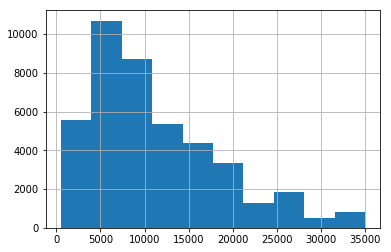

In [29]:
df['loan_amnt'].hist()

In [30]:
df['loan_amnt'] = np.log(df['loan_amnt'])

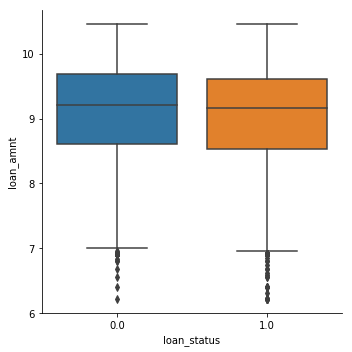

In [31]:
sns.catplot(x="loan_status", y="loan_amnt", kind="box", data=df);

In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [33]:
df[df['funded_amnt'] == 0.0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [34]:
df['funded_amnt'] = np.log(df['funded_amnt'])

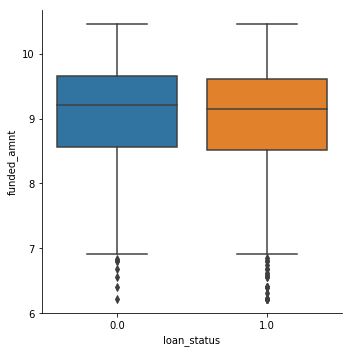

In [35]:
sns.catplot(x = 'loan_status', y = 'funded_amnt',kind = 'box', data = df)

In [36]:
df['funded_amnt_inv'].isnull().sum()

7

In [37]:
np.mean(df['funded_amnt_inv'])

10139.93878474481

In [38]:
df['funded_amnt_inv'].dropna(axis = 0, inplace = True)

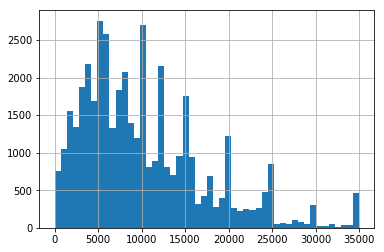

In [39]:
df['funded_amnt_inv'].hist(bins = 50)

In [40]:
df['funded_amnt_inv'].isnull().sum()

0

In [41]:
#df.loc[df['funded_amnt_inv'] ==0.0,'funded_amnt_inv'] = np.mean(df['funded_amnt_inv'])

In [42]:
#df['funded_amnt_inv'] = np.exp(df['funded_amnt_inv'])

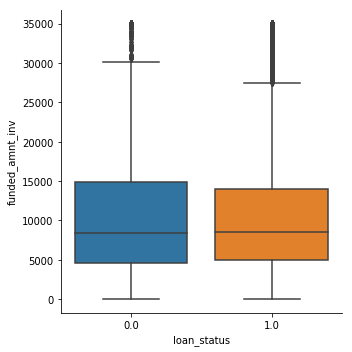

In [43]:
sns.catplot(x = 'loan_status', y = 'funded_amnt_inv',kind = 'box', data = df)

In [44]:
df['term'].value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

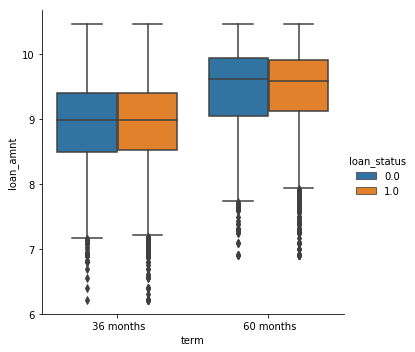

In [45]:
sns.catplot(x = 'term', y = 'loan_amnt',hue = 'loan_status', kind = 'box', data = df, orient = 'V')

In [46]:
df['term'].isnull().sum()

7

In [47]:
df['term'].fillna(36.0, inplace = True)

In [48]:
map_term = {' 36 months' : 36, ' 60 months' : 60, 36.0 : 36}
df['term'] = df['term'].apply(lambda x : float(map_term[x]))
df['term'].unique()

array([36., 60.])

In [49]:
np.mean(df['loan_amnt'])

9.072473184839865

In [50]:
df['loan_amnt'].fillna(np.mean(df['loan_amnt']), inplace = True)

In [51]:
df[df['loan_amnt'] == float("-inf")]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [52]:
df['funded_amnt'].fillna(np.mean(df['funded_amnt']), inplace = True)

In [53]:
df[df['funded_amnt'] == float("-inf")]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [54]:
df['int_rate'] = df['int_rate'].str.rstrip('%')

In [55]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x))

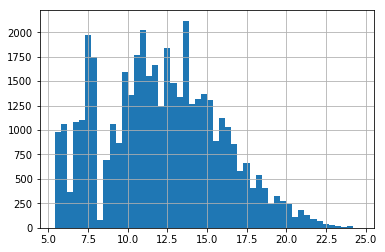

In [56]:
df['int_rate'].hist(bins = 50)

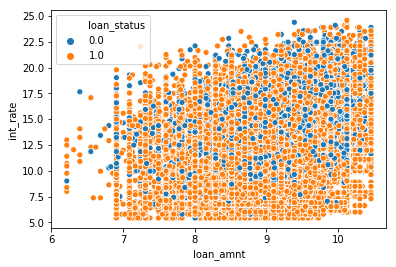

In [57]:
sns.scatterplot(x = 'loan_amnt', y = 'int_rate',data = df, hue = 'loan_status')

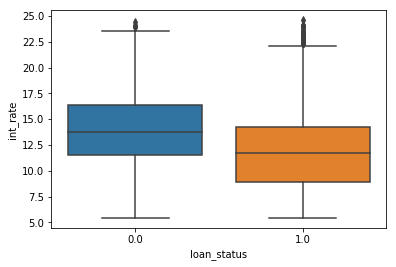

In [58]:
sns.boxplot(x = 'loan_status', y = 'int_rate', data = df)

In [59]:
sns.countplot(x = 'credit_policy', hue = 'loan_status', data = df)

ValueError: Could not interpret input 'credit_policy'

In [ ]:
df['installment'].isnull().sum()

In [ ]:
np.mean(df['installment'])

In [ ]:
df['installment'].fillna(np.mean(df['installment']), inplace = True)

In [ ]:
df['installment'] = np.log(df['installment'])

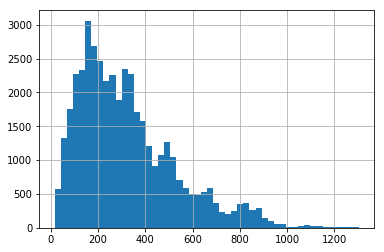

In [60]:
df['installment'].hist(bins = 50)

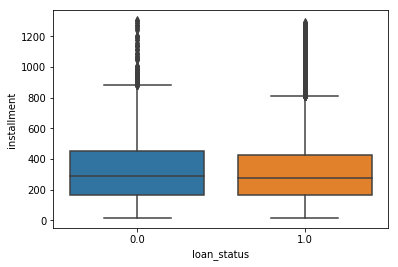

In [61]:
sns.boxplot(y = 'installment', x = 'loan_status', data = df)

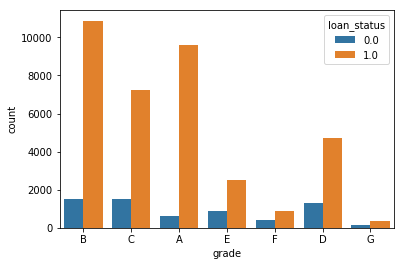

In [62]:
sns.countplot(df['grade'], hue = 'loan_status', data = df)

In [63]:
df['grade'].value_counts()

B    12389
A    10183
C    8740 
D    6016 
E    3394 
F    1301 
G    512  
Name: grade, dtype: int64

In [64]:
df['grade'].isnull().sum()

7

In [65]:
df['grade'].dropna(axis = 0, inplace = True)

In [66]:
mapping = {'A' : 7, 'B' : 6, 'C' : 5, 'D' : 4, 'E' : 3, 'F' : 2, 'G' : 1}

In [67]:
df['grade'] = df['grade'].apply(lambda x : mapping[x])

In [68]:
df['emp_title'].isnull().sum()

2633

In [69]:
df['emp_title'].value_counts()

US Army                              139
Bank of America                      115
IBM                                  72 
Kaiser Permanente                    61 
AT&T                                 61 
UPS                                  58 
Wells Fargo                          57 
USAF                                 56 
US Air Force                         55 
Self Employed                        49 
United States Air Force              48 
Walmart                              47 
Lockheed Martin                      46 
State of California                  45 
Verizon Wireless                     43 
U.S. Army                            42 
Walgreens                            41 
USPS                                 41 
US ARMY                              40 
Self                                 39 
Best Buy                             38 
JPMorgan Chase                       38 
JP Morgan Chase                      38 
Target                               38 
Department of De

In [70]:
df['emp_title'].nunique()

30658

In [71]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

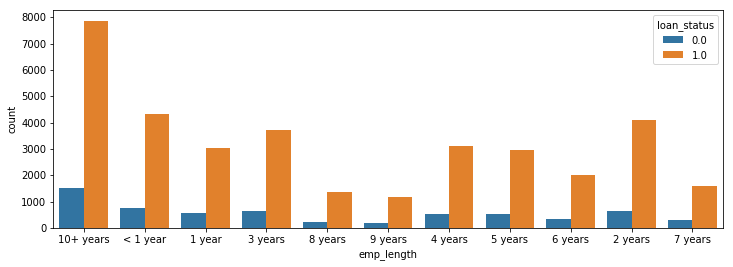

In [72]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'emp_length', hue = 'loan_status', data = df)

In [73]:
df['emp_length'].isnull().sum()

1119

In [74]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [75]:
df['emp_length'].dropna(axis = 0, inplace = True)

In [76]:
mapping_empLength = {'10+ years' : 10, '9 years' : 9, '8 years' : 8, '7 years' : 7, '6 years' : 6, '5 years' : 5, 
                    '4 years' : 4, '3 years' : 3, '2 years' : 2, '1 year' : 1, '< 1 year' : 0}

In [77]:
df['emp_length'] = df['emp_length'].apply(lambda x : mapping_empLength[x])

In [78]:
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN         3251 
OTHER       136  
NONE        8    
Name: home_ownership, dtype: int64

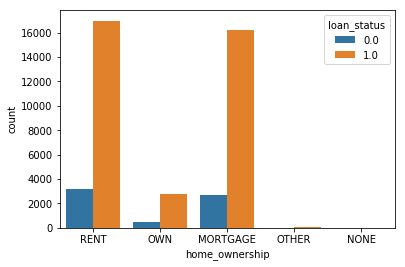

In [79]:
sns.countplot(x = 'home_ownership', hue = 'loan_status', data = df)

In [80]:
home_ownership = pd.DataFrame()
home_ownership = pd.get_dummies(df['home_ownership'])

In [81]:
df['home_ownership'].isnull().sum()

7

In [82]:
df['home_ownership'].dropna(axis = 0, inplace = True)

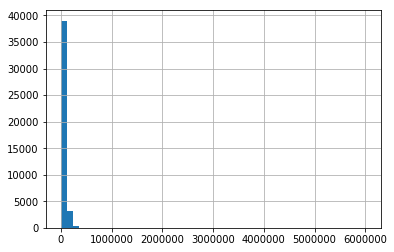

In [83]:
df['annual_inc'].hist(bins = 50)

In [84]:
df['annual_inc'].isnull().sum()

11

In [85]:
np.mean(df['annual_inc'])

69136.55642025822

In [86]:
df['annual_inc'].fillna(np.mean(df['annual_inc']), inplace = True)

In [87]:
df[df['annual_inc'] == 0.0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [88]:
df['annual_inc'] = np.log(df['annual_inc'])

In [89]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [90]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

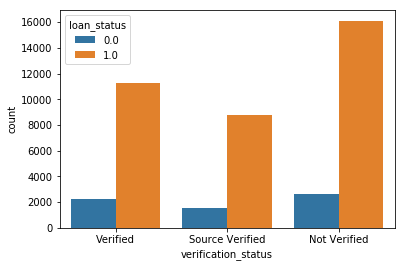

In [91]:
sns.countplot(x = 'verification_status', hue = 'loan_status', data = df)

In [124]:
feature = {'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'grade', 'emp_length', 'loan_status',
           'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec','revol_bal', 'revol_util','total_acc',
           'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee',
           'recoveries','pub_rec_bankruptcies','debt_settlement_flag', 'Not Verified',
           'Verified', 'Source Verified'}

In [93]:
df['debt_settlement_flag'].value_counts()

N    42375
Y    160  
Name: debt_settlement_flag, dtype: int64

In [94]:
df['debt_settlement_flag'].isnull().sum()

7

In [95]:
df['debt_settlement_flag'].fillna('N', inplace = True)

In [96]:
map_yn = {'N' : 0.0, 'Y' : 1.0}

In [97]:
df['debt_settlement_flag'] = df['debt_settlement_flag'].apply(lambda x : map_yn[x])

In [98]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [99]:
df['verification_status'].isnull().sum()

7

In [100]:
df['verification_status'].dropna(axis = 0, inplace = True)

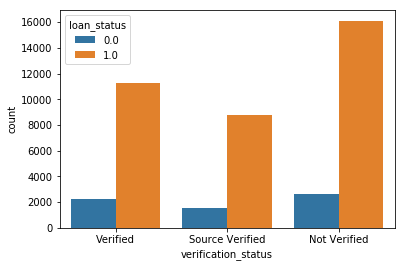

In [101]:
sns.countplot(x = 'verification_status', hue = 'loan_status', data = df)

In [102]:
df = pd.concat([df, pd.get_dummies(df['verification_status'])], axis = 1)

In [103]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [104]:
df.drop('initial_list_status', axis = 1, inplace = True)

In [105]:
df['hardship_flag'].value_counts()

N    42535
Name: hardship_flag, dtype: int64

In [106]:
df['revol_util'].dtype

dtype('O')

In [107]:
df['revol_util'].isnull().sum()

97

In [108]:
df['revol_util'] = df['revol_util'].str.rstrip(' %')

In [109]:
df['revol_util'] = df['revol_util'].apply(lambda x : float(x))

In [110]:
np.mean(df['revol_util'])

49.11715561314637

In [111]:
df['revol_util'].fillna(np.mean(df['revol_util']), inplace = True)

In [112]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [113]:
df.drop('application_type', axis = 1, inplace = True)

In [114]:
df['purpose'].value_counts()

debt_consolidation    19776
credit_card           5477 
other                 4425 
home_improvement      3199 
major_purchase        2311 
small_business        1992 
car                   1615 
wedding               1004 
medical               753  
moving                629  
house                 426  
educational           422  
vacation              400  
renewable_energy      106  
Name: purpose, dtype: int64

In [115]:
df['purpose'].isnull().sum()

7

In [116]:
df['purpose'].dropna(axis = 0, inplace = True)

In [117]:
purpose = pd.DataFrame()
purpose = pd.get_dummies(df['purpose'])
#purpose.head()

In [125]:
final_data = df[feature]

In [126]:
final_data = pd.concat([final_data, purpose, home_ownership], axis = 1 )

In [127]:
final_data.dtypes

total_rec_prncp         float64
emp_length              float64
term                    float64
total_pymnt             float64
total_rec_late_fee      float64
Not Verified            float64
funded_amnt_inv         float64
open_acc                float64
revol_util              float64
Verified                float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
loan_amnt               float64
total_acc               float64
recoveries              float64
funded_amnt             float64
loan_status             float64
grade                   float64
dti                     float64
pub_rec                 float64
total_rec_int           float64
debt_settlement_flag    float64
Source Verified         float64
delinq_2yrs             float64
annual_inc              float64
revol_bal               float64
car                     float64
credit_card             float64
debt_consolidation      float64
educational             float64
home_improvement        float64
house   

In [128]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42542 entries, 0 to 42541
Data columns (total 45 columns):
total_rec_prncp         42535 non-null float64
emp_length              41423 non-null float64
term                    42542 non-null float64
total_pymnt             42535 non-null float64
total_rec_late_fee      42535 non-null float64
Not Verified            42535 non-null float64
funded_amnt_inv         42535 non-null float64
open_acc                42506 non-null float64
revol_util              42542 non-null float64
Verified                42535 non-null float64
total_pymnt_inv         42535 non-null float64
pub_rec_bankruptcies    42542 non-null float64
loan_amnt               42542 non-null float64
total_acc               42506 non-null float64
recoveries              42535 non-null float64
funded_amnt             42542 non-null float64
loan_status             42542 non-null float64
grade                   42535 non-null float64
dti                     42535 non-null float6

In [129]:
df['pub_rec_bankruptcies'].value_counts()

0.0    40688
1.0    1846 
2.0    8    
Name: pub_rec_bankruptcies, dtype: int64

In [130]:
df['pub_rec_bankruptcies'].fillna(0.0, inplace = True)

In [131]:
final_data.dropna(axis = 0, inplace = True)

In [132]:
final_data.isnull().sum()

total_rec_prncp         0
emp_length              0
term                    0
total_pymnt             0
total_rec_late_fee      0
Not Verified            0
funded_amnt_inv         0
open_acc                0
revol_util              0
Verified                0
total_pymnt_inv         0
pub_rec_bankruptcies    0
loan_amnt               0
total_acc               0
recoveries              0
funded_amnt             0
loan_status             0
grade                   0
dti                     0
pub_rec                 0
total_rec_int           0
debt_settlement_flag    0
Source Verified         0
delinq_2yrs             0
annual_inc              0
revol_bal               0
car                     0
credit_card             0
debt_consolidation      0
educational             0
home_improvement        0
house                   0
major_purchase          0
medical                 0
moving                  0
other                   0
renewable_energy        0
small_business          0
vacation    

In [133]:
for col in final_data:
    if(final_data[col].all() == float('inf')):
        print("yes")

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
def check_useful_features():
    model = RandomForestClassifier()
    model.fit(final_data.drop('loan_status', axis = 1), final_data['loan_status'])
    feature_importances = pd.DataFrame(model.feature_importances_, index = final_data.drop('loan_status', axis = 1).columns,
                                       columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)

In [135]:
check_useful_features()

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                      importance
recoveries            0.593892  
total_rec_prncp       0.148432  
loan_amnt             0.068786  
total_pymnt           0.049726  
total_pymnt_inv       0.031452  
funded_amnt           0.024146  
funded_amnt_inv       0.022177  
total_rec_late_fee    0.015411  
total_rec_int         0.013430  
debt_settlement_flag  0.007025  
term                  0.003829  
annual_inc            0.002684  
revol_util            0.002513  
revol_bal             0.002447  
grade                 0.002136  
dti                   0.002045  
debt_consolidation    0.001818  
total_acc             0.001559  
open_acc              0.001551  
emp_length            0.000834  
Not Verified          0.000496  
Verified              0.000468  
small_business        0.000334  
MORTGAGE              0.000304  
pub_rec_bankruptcies  0.000298  
pub_rec               0.000296  
RENT                  0.000258  
other                 0.000212  
delinq_2yrs           0.000191  
major_purc

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train_x, test_x, train_y, test_y = train_test_split(final_data.drop('loan_status', axis = 1), final_data['loan_status'],
                                                   test_size = 0.3)

In [138]:
X = final_data.drop('loan_status', axis = 1)

In [139]:
y = final_data['loan_status']

In [140]:
from sklearn.svm import SVC
def svc_model():
    svc = SVC()
    svc.fit(train_x, train_y)
    pred_svc = svc.predict(test_x)
    print(classification_report(pred_svc, test_y))
    print(confusion_matrix(pred_svc, test_y))
    print(svc.score(test_x, test_y))

In [141]:
svc_model()

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.85      0.92     12419

    accuracy                           0.85     12419
   macro avg       0.50      0.42      0.46     12419
weighted avg       1.00      0.85      0.92     12419

[[    0     0]
 [ 1912 10507]]
0.8460423544568806


In [150]:
from sklearn.model_selection import GridSearchCV
def grid_Search():
    param_grid = {'C':[0.1, 0.01, 0.001, 1, 10, 100], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, n_jobs = 6)
    grid.fit(train_x, train_y)
    print(classification_report(test_y, grid.predict(test_x)))
    print('\n')
    print(confusion_matrix(test_y, grid.predict(test_x)))
    print(grid.best_params_)
    return grid
#grid = grid_Search()

In [143]:
from sklearn.model_selection import KFold
model_score = []
def kfold_random_forest(model):
    kf = KFold(n_splits=10,  random_state=None)
    for train_index, test_index in kf.split(final_data):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        #print("Random Forest\n")
        print(classification_report(pred, y_test))
        model_score.append(model.score(X_test, y_test))

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       688
         1.0       1.00      1.00      1.00      3452

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       614
         1.0       1.00      1.00      1.00      3526

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       604
         1.0       1.00      1.00      1.00      3536

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140

              preci

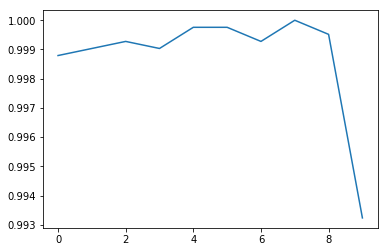

In [144]:
rf_model = RandomForestClassifier()
kfold_random_forest(rf_model)
plt.plot(model_score)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
lr_model = LogisticRegression()
kfold_random_forest(lr_model)

C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       687
         1.0       1.00      1.00      1.00      3453

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       613
         1.0       1.00      1.00      1.00      3527

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       603
         1.0       1.00      1.00      1.00      3537

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       626
         1.0       1.00      1.00      1.00      3514

    accuracy                           1.00      4140
   macro avg       1.00      1.00      1.00      4140
weighted avg       1.00      1.00      1.00      4140



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       565
         1.0       1.00      1.00      1.00      3574

    accuracy                           1.00      4139
   macro avg       0.99      0.99      0.99      4139
weighted avg       1.00      1.00      1.00      4139



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       532
         1.0       1.00      1.00      1.00      3607

    accuracy                           1.00      4139
   macro avg       0.99      1.00      1.00      4139
weighted avg       1.00      1.00      1.00      4139



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       566
         1.0       1.00      1.00      1.00      3573

    accuracy                           1.00      4139
   macro avg       0.99      1.00      0.99      4139
weighted avg       1.00      1.00      1.00      4139



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       430
         1.0       1.00      1.00      1.00      3709

    accuracy                           1.00      4139
   macro avg       0.99      1.00      0.99      4139
weighted avg       1.00      1.00      1.00      4139



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       529
         1.0       1.00      1.00      1.00      3610

    accuracy                           1.00      4139
   macro avg       0.99      1.00      1.00      4139
weighted avg       1.00      1.00      1.00      4139



C:\Users\rohiranj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       851
         1.0       1.00      0.96      0.98      3288

    accuracy                           0.97      4139
   macro avg       0.93      0.98      0.95      4139
weighted avg       0.97      0.97      0.97      4139



In [147]:
from sklearn.neighbors import KNeighborsClassifier

************1**************
0.9769707705934455
************2**************
0.973991464691199
************3**************
0.9749577260649006
************4**************
0.9747161607214752
************5**************
0.9716563330380869
************6**************
0.9723005072872212
************7**************
0.9696432885095418
************8**************
0.9701264191963926
************9**************
0.967147113294146
************10**************
0.9677912875432805
************11**************
0.9651340687656011
************12**************
0.9661003301393026
************13**************
0.9636846767050488
************14**************
0.9645704162976085
************15**************
0.9620742410822127
************16**************
0.9627989371124889
************17**************
0.9605443272405185
************18**************
0.960785892583944
************19**************
0.9592559787422498
************20**************
0.959980674772526
************21**************
0.9580481520251228
*****

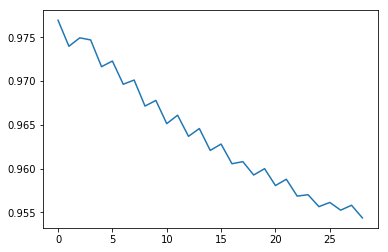

In [148]:
model_score_knn = []
for i in range(1,30):
    print('************'+str(i)+"**************")
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_x, train_y)
    pred = knn_model.predict(test_x)
    score = knn_model.score(test_x, test_y)
    print(score)
    model_score_knn.append(score)
plt.plot(model_score_knn)